In [1]:
import math as m
import numpy as np
import random as rnd
import re
import itertools as it
import pandas as pd
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from scipy.special import factorial2
from scipy.special import factorial
from scipy.special import binom
import scipy.stats as sps
import seaborn as sns
%matplotlib inline

# 7.1

Let X∼Bern(p). Let $I_1$  be the indicator that X=1 and $I_0$ be the indicator that X=0. Find Cov($I_1$,$I_0$).

In [2]:
p = 1/3
samps = 10000

flips = np.random.binomial(n = 1, p = p, size = samps)

print('Simulated Covariance: %.2f' % np.cov(m = flips, y = (1-flips))[0,1])

print('Analytical Covariance: %.2f' % (p**2-p))

print('Correlation: %.0f' % (np.corrcoef(flips,1-flips)[0,1]))

Simulated Covariance: -0.22
Analytical Covariance: -0.22
Correlation: -1


### 7.1 Analytical Solution

First, let's set up the covariance calculation.

## $Cov(I_1,I_0) = E[I_1 I_0] - E[I_1]E[I_0]$  

Next, let's focus on the first part. Since one of $I_1$ and $I_0$ must always be zero, a joint expectation over them must also evaluate to zero. 

## $E[I_1 I_0] = (1*0*p) + (0*1*(1-p)) = 0$  

Finally, the right side is straightforward:  

## $- E[I_1]E[I_0] = -(p * (1-p)) = p^2 - p = Cov(I_1,I_0)$  

It’s important to note that the correlation, the normalized covariance, always evaluates to -1. The linear relationship between the two variables is perfectly negative. This is by construction.

# 7.2

Let U∼Unif(0,1). Find Cov(U,1−U).

In [3]:
samps = 10000

unif_obs = np.random.uniform(low = 0, high = 1, size = samps)

np.cov(m = unif_obs, y = (1-unif_obs))

array([[ 0.08350003, -0.08350003],
       [-0.08350003,  0.08350003]])

### 7.2 Analytical Solution

We can substitute our Uniform variables into $Cov(X,Y+Z) = Cov(X,Y) + Cov(X,Z)$:  

## $Cov(U, 1 - U) = Cov(U, 1) - Cov(U, U)$  

The covariance between a constant and a random variable is zero, since the constant doesn't vary. Then we're left with:  

## $-Cov(U, U) = -Var(U) = -1/12$

# 7.3

Let Z∼N(0,1). Find $Cov(Z^2,Z^3)$.

Simulated Covariance: 0.07


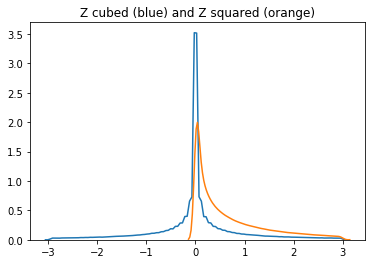

In [4]:
samps = 1000000

norm = np.random.normal(size = samps)
norm_sq = norm**2
norm_cub = norm**3

print('Simulated Covariance: %.2f' % (np.cov(m = norm_sq, y = norm_cub)[0,1]))

_= sns.distplot(norm_cub, hist = False, kde_kws={'clip': (-3.0, 3.0)})
_= sns.distplot(norm_sq, hist = False, kde_kws={'clip': (-3.0, 3.0)})
_ = plt.title('Z cubed (blue) and Z squared (orange)')

### 7.3 Analytical Solution

## $Cov(Z^2,Z^3) = E[Z^2Z^3] - E[Z^2]E[Z^3] = E[Z^5] - E[Z^2]E[Z^3] = 0$

Due to its symmetry, all the odd moments of a standard normal are zero. Since 3 and 5 are odd, both sides go to zero. Intuitively, it makes sense that squaring and cubing the same random variable erases the linear relationship.

# 7.4

Let X∼Unif(−3,−1), Y∼Unif(−1,1) and Z∼Unif(1,3). All of these random variables are independent. Let D1 = Z−Y and D2 = Y−X. Find Cov(D1,D2). Provide some intuition for this result.

In [5]:
samps = 10000

x = np.random.uniform(low = -3, high = -1, size = samps)
y = np.random.uniform(low = -1, high = 1, size = samps)
z = np.random.uniform(low = 1, high = 3, size = samps)

d1 = z - y
d2 = y - x

print('Simulated covariance: %.2f' % (np.cov(d1,d2)[0,1]))

Simulated covariance: -0.33


### 7.4 Analytical Solution

### $Cov(D_1, D_2) = Cov(Z - Y, Y - X) = Cov(Z, Y) - Cov(Z, X) - Cov(Y, Y) + Cov(Y, X)$

Most of the terms above go to zero due to X,Y,Z being idependent. We're just left with $-Cov(Y, Y)$, which is just $-Var(Y)$. This becomes:  

## $-Var(Y) = \frac{-(b-a)^2}{12} = \frac{-1}{3}$

Intuitively, the covariance between d1 and d2 must be nonzero due to the dependence on Y.

# 7.5

a. Is it possible to construct random variables X and Y such that X and Y are not marginally Normal but the vector {X,Y} is MVN?

b. Can we consider the set of integers {0,1,...,100} to be MVN?

### 7.5 Analytical Solution

a. By definition, the marginals must be normal.

b. The sums of sub-samples of {0,..100} will converge to a discretized normal-like distribution.

# 7.6

Let U∼Unif(0,1) and A be the area of the random, 2-D disk with radius U

a. Intuitively, does A have a Uniform distribution?  
b. Find the PDF of A  
c. Verify that the PDF of A is a valid PDF.  

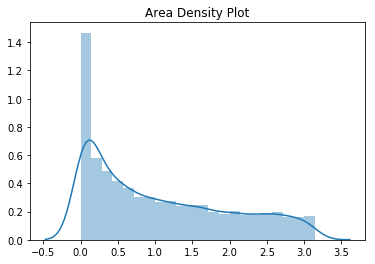

In [6]:
samps = 10000

unif = np.random.uniform(low = 0, high = 1, size = samps)
area = np.pi * unif**2

_= sns.distplot(area, hist = True)
_ = plt.title('Area Density Plot')

### 7.6 Analytical Solution

a. The area RV is defined as $A = \pi * U^2$. Squaring sqeezes numbers under 1 towards 0 and stretches numbers greater than 1 towards infinity. This effect breaks the uniform structure of the distribution. Intuituively, the area distribution should have a large mass to its left and a long right tail.

b. The PDF is a transformation on the original Uniform PDF. We know that $A = \pi * U^2$ and therefore $U = \sqrt{\frac{A}{\pi}}$.

## $f(a) = f(u)\frac{du}{da} = \frac{1}{2\sqrt{A\pi}}$

c. We can integrate this PDF to confirm its valid:

## $\frac{1}{2\sqrt{\pi}} \int_0^\pi a^{-1/2} da = \frac{1}{2 \pi} 2\sqrt{a}\big|_0^\pi = \frac{\sqrt{pi}}{\sqrt{pi}} - 0 = 1$

# 7.7

Let X∼Expo(λ) and Y=X+c for some constant c. Does Y have an Exponential distribution? Use the PDF of Y to answer this question (and verify that the PDF you find is a valid PDF).

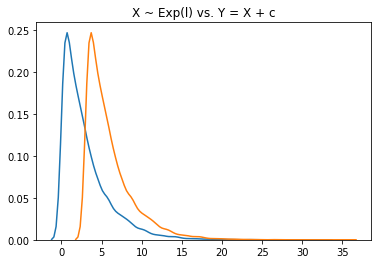

In [7]:
samps = 10000

exps = np.random.exponential(scale = 3, size = samps)

exps_c = exps + 3

_= sns.distplot(exps, hist = False)
_= sns.distplot(exps_c, hist = False)
_ = plt.title('X ~ Exp(l) vs. Y = X + c')

### 7.7 Analytical Solution

## $f(x) = \lambda e^{-\lambda x}, Y = X + c, \frac{dx}{dy} = 1$  

## $f(y) = f(x)\frac{dx}{dy} = \lambda e^{-\lambda (y-c)}$  

This look exactly like a shifted exponential distribution. However, since the support is different $[c,\infty]$ this is *not* exponentially distributed.

# 7.8

Let X,Y be i.i.d. N(0,1), and let Z = min(X,Y) and W = max(X,Y). Nick says that, since {Z,W} is the same vector as {X,Y} and {X,Y} is BVN, we know that {Z,W} is also BVN. Is Nick correct?

Hint: the maximum of two Normal distributions is not Normal.

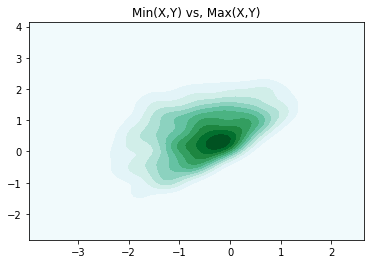

In [8]:
samps = 1000

x_y = np.random.normal(size = (samps,2))

mins = np.min(x_y, axis = 1)
maxs = np.max(x_y, axis = 1)

_ = sns.kdeplot(mins, maxs, shade = True)
_ = plt.title('Min(X,Y) vs, Max(X,Y)')

## 7.8 Analytical Solution

Since the marginals are not normally distributed, the distribution cannot be BVN.

0 + W = W is not normally distributed. 

# 7.9

Let X,Y be i.i.d. N(0,1). Find $E((X+Y)^2)$ using algebraic expansion and linearity of expectation.

In [9]:
print('Simulated Mean: %.2f' % (np.mean((np.random.normal(size = 10000) + np.random.normal(size = 10000))**2)))

Simulated Mean: 1.99


### 7.9 Analytical Solution

## $E[(X + Y)^2] = E[X^2] + E[Y^2] + 2E[XY] = 1 + 1 + 0 = 2$

# 7.10

Nick argues that $U^k∼Unif(0,1)$, where $U∼Unif(0,1)$ and k is a known integer. He argues that each point in U, raised to k, maps to a point in the interval 0 to 1. Use the transformation theorem to adjudicate his claim, and verify that the PDF that you find is a valid PDF.

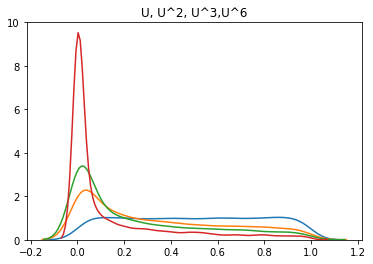

In [10]:
samps = 10000

unif = np.random.uniform(size = samps)
unif_sq = unif**2
unif_cub = unif**3
unif_six = unif**6

_= sns.distplot(unif, hist = False)
_= sns.distplot(unif_sq, hist = False)
_= sns.distplot(unif_cub, hist = False)
_= sns.distplot(unif_six, hist = False)
_ = plt.title('U, U^2, U^3,U^6')

### 7.10 Analytical Solution

## $f(y) = f(x)\frac{dx}{dy}, f(x) = 1, y = x^k$  

## $x = \sqrt[k]{y} = y^{\frac{1}{k}}, \frac{d}{dy} (y^{\frac{1}{k}}) = \frac{y^{1/k - 1}}{k} = f(y)$  

## $\int_0^1 \frac{y^{1/k - 1}}{k} dy = \frac{y^{1/k}}{1/k * k} = y^{1/k} \big|_0^1 = 1-0 = 1$  

Intuitively, as k gets larger the squishing towards zero effect gets stronger, creating a higher peak near 0.

# 7.11

Let U∼Unif(0,1) and c be a constant. Let X=cU

a. Find the distribution of X by finding the PDF f(x)

b. Provide some intuition for the result in part a.

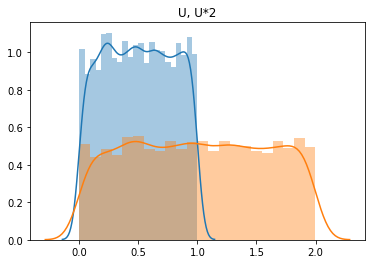

In [11]:
samps = 10000

unif_reg = np.random.uniform(low = 0, high = 1, size = samps)
unif_x_c = unif_reg * 2

_= sns.distplot(unif_reg, hist = True)
_= sns.distplot(unif_x_c, hist = True)
_ = plt.title('U, U*2')

### 7.11 Analytical Solution

## $f(y) = f(x)\frac{dx}{dy}, f(x) = 1, y = x*c, \frac{dx}{dy} = \frac{1}{c}$  

## $f(y) = 1/c$

The above PDF is defined on the support [0,c]. This look exactly like U ~ Unif(0,c). This intuitively makes sense since multiplying by a constant uniformally stretches out the PDF of the standard uniform.

# 7.12

Let $U_1$ and $U_2$ be i.i.d. Unif(0,1) (that is, Standard Uniform). Nick says that if $X = U_1⋅U_2$, then X∼Unif(0,1), since the support of X is and value in the integer (0, 1) and multiplying two Standard Uniforms results in a Standard Uniform. Challenge his claim.

Hint: Find Var(X) and compare it to the variance of a Standard Uniform.

Provide intuition about the variance you found in part a. and how it compares to the variance of a Standard Uniform. 

Simulated Variance: 0.0476
Analytical Variance: 0.0486


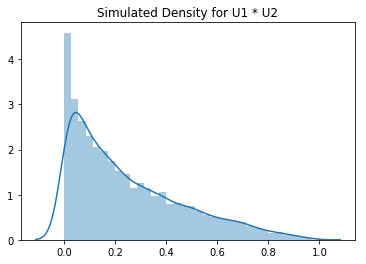

In [12]:
samps = 10000
 
unif_1 = np.random.uniform(low = 0, high = 1, size = samps)
unif_2 = np.random.uniform(low = 0, high = 1, size = samps)

mult_unif = unif_1 * unif_2

print('Simulated Variance: %.4f' % (np.var(mult_unif)))
print('Analytical Variance: %.4f' % (7/144))

#
_= sns.distplot(mult_unif, hist = True)
_ = plt.title('Simulated Density for U1 * U2')

### 7.12 Analytical Solution

## $Var(U_1 * U_2) = E[(U_1 * U_2)^2] - E[U_1 * U_2]^2$  

## $ = E[U_1^2] * E[U_2^2] - E[U_1]^2 * E[U_2]^2$  

We know the mean of the standard uniform, 1/2, so we can figure out the right side of the variance easily. The left side is a little more tricky. The second noncentral moment is:  

## $Var(U) = E[U^2] - E[U]^2, \text{ so then } E[U^2] = Var(U) + E[U]^2 = 1/12 + 1/4 = 1/3$  

## $E[U_1^2] * E[U_2^2] - E[U_1]^2 * E[U_2]^2 = (1/3)^2 - (1/4)^2 = 7/144$  

Intuituively it makes sense that the product is not a standard uniform. Products of numbers under 1 tend to sequeeze towards zero. This explains the left mass in the distribution.

# 7.13

Let c be a constant and X be a random variable. For the following distributions of X, see if Y = cX has the same distribution as X

(not the same parameters, but the same distribution).

a. X ∼ Expo(λ)  
b. X ∼ Bin(n,p)  
c. X ∼ Pois(λ)  

# 7.13 Analytical Solution

## $Y = c*X, X = Y/c, dx/dy = 1/c$

## $f(y) = f(x)\frac{dx}{dy}, f(x) = \lambda e^{\lambda x} = \frac{\lambda e^{-\lambda y/c}}{c}$  

An exponential remains an exponential as long as the ratio $\lambda/c > 0$  

This doesn't work for discrete distributions since the support is broken. Even if c is a positive integer, this makes the function skip some parts of the number line. For example {0,1,2,3,..} turns into {0,2,4,6,...} when c = 2. 

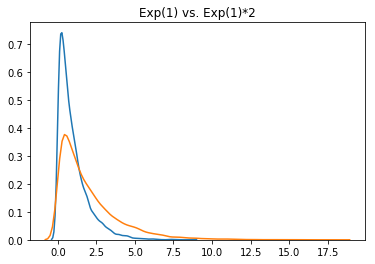

In [13]:
_= sns.distplot(np.random.exponential(scale = 1, size = 10000), hist = False)
_= sns.distplot(np.random.exponential(scale = 1, size = 10000) * 2, hist = False)
_ = plt.title('Exp(1) vs. Exp(1)*2')

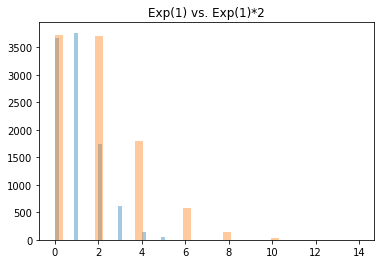

In [14]:
_= sns.distplot(np.random.poisson(lam = 1, size = 10000), hist = True, kde = False)
_= sns.distplot(np.random.poisson(lam = 1, size = 10000) * 2, hist = True, kde = False)
_ = plt.title('Exp(1) vs. Exp(1)*2')

# 7.14

a. Let X be a random variable and let c be a constant and let Y=cX. Show that Corr(X,Y)=1.

b. Let X be a random variable and let c be a constant and let Y=X+c. Show that Corr(X,Y)=1.

### 7.14 Analytical Solution

## $Cor(X, cX) = \frac{Cov(X, cX)}{\sqrt{Var(x)} \sqrt{Var(c*x)}} = \frac{c * Cov(X, X)}{\sqrt{Var(x)} \sqrt{c^2 * Var(x)}} = \frac{c * Cov(X, X)}{c * \sqrt{Var(x)} \sqrt{Var(x)}} = 1$

## $Cor(X, c + x) = \frac{Cov(X,X) + Cov(X,c)}{Var(X + c)} = \frac{Cov(X,X)}{Var(X)} = 1$

In [15]:
samps = 10000

rand_chi = np.random.chisquare(df = 1, size = samps)

print('Simulated Corr(X, cX) = %.2f' % (np.corrcoef(rand_chi, rand_chi*2)[0,1]))

print('Simulated Corr(X, X + c) = %.2f' % (np.corrcoef(rand_chi, rand_chi + 2)[0,1]))

Simulated Corr(X, cX) = 1.00
Simulated Corr(X, X + c) = 1.00
